In [1]:
import pdf2image #1.17.0

In [2]:

doc_img = pdf2image.convert_from_path(r"C:\Users\abhic\Desktop\Chatbot\RAG_Application\RAG_Application\Akshay_CV.pdf", dpi=300)

pages: 2


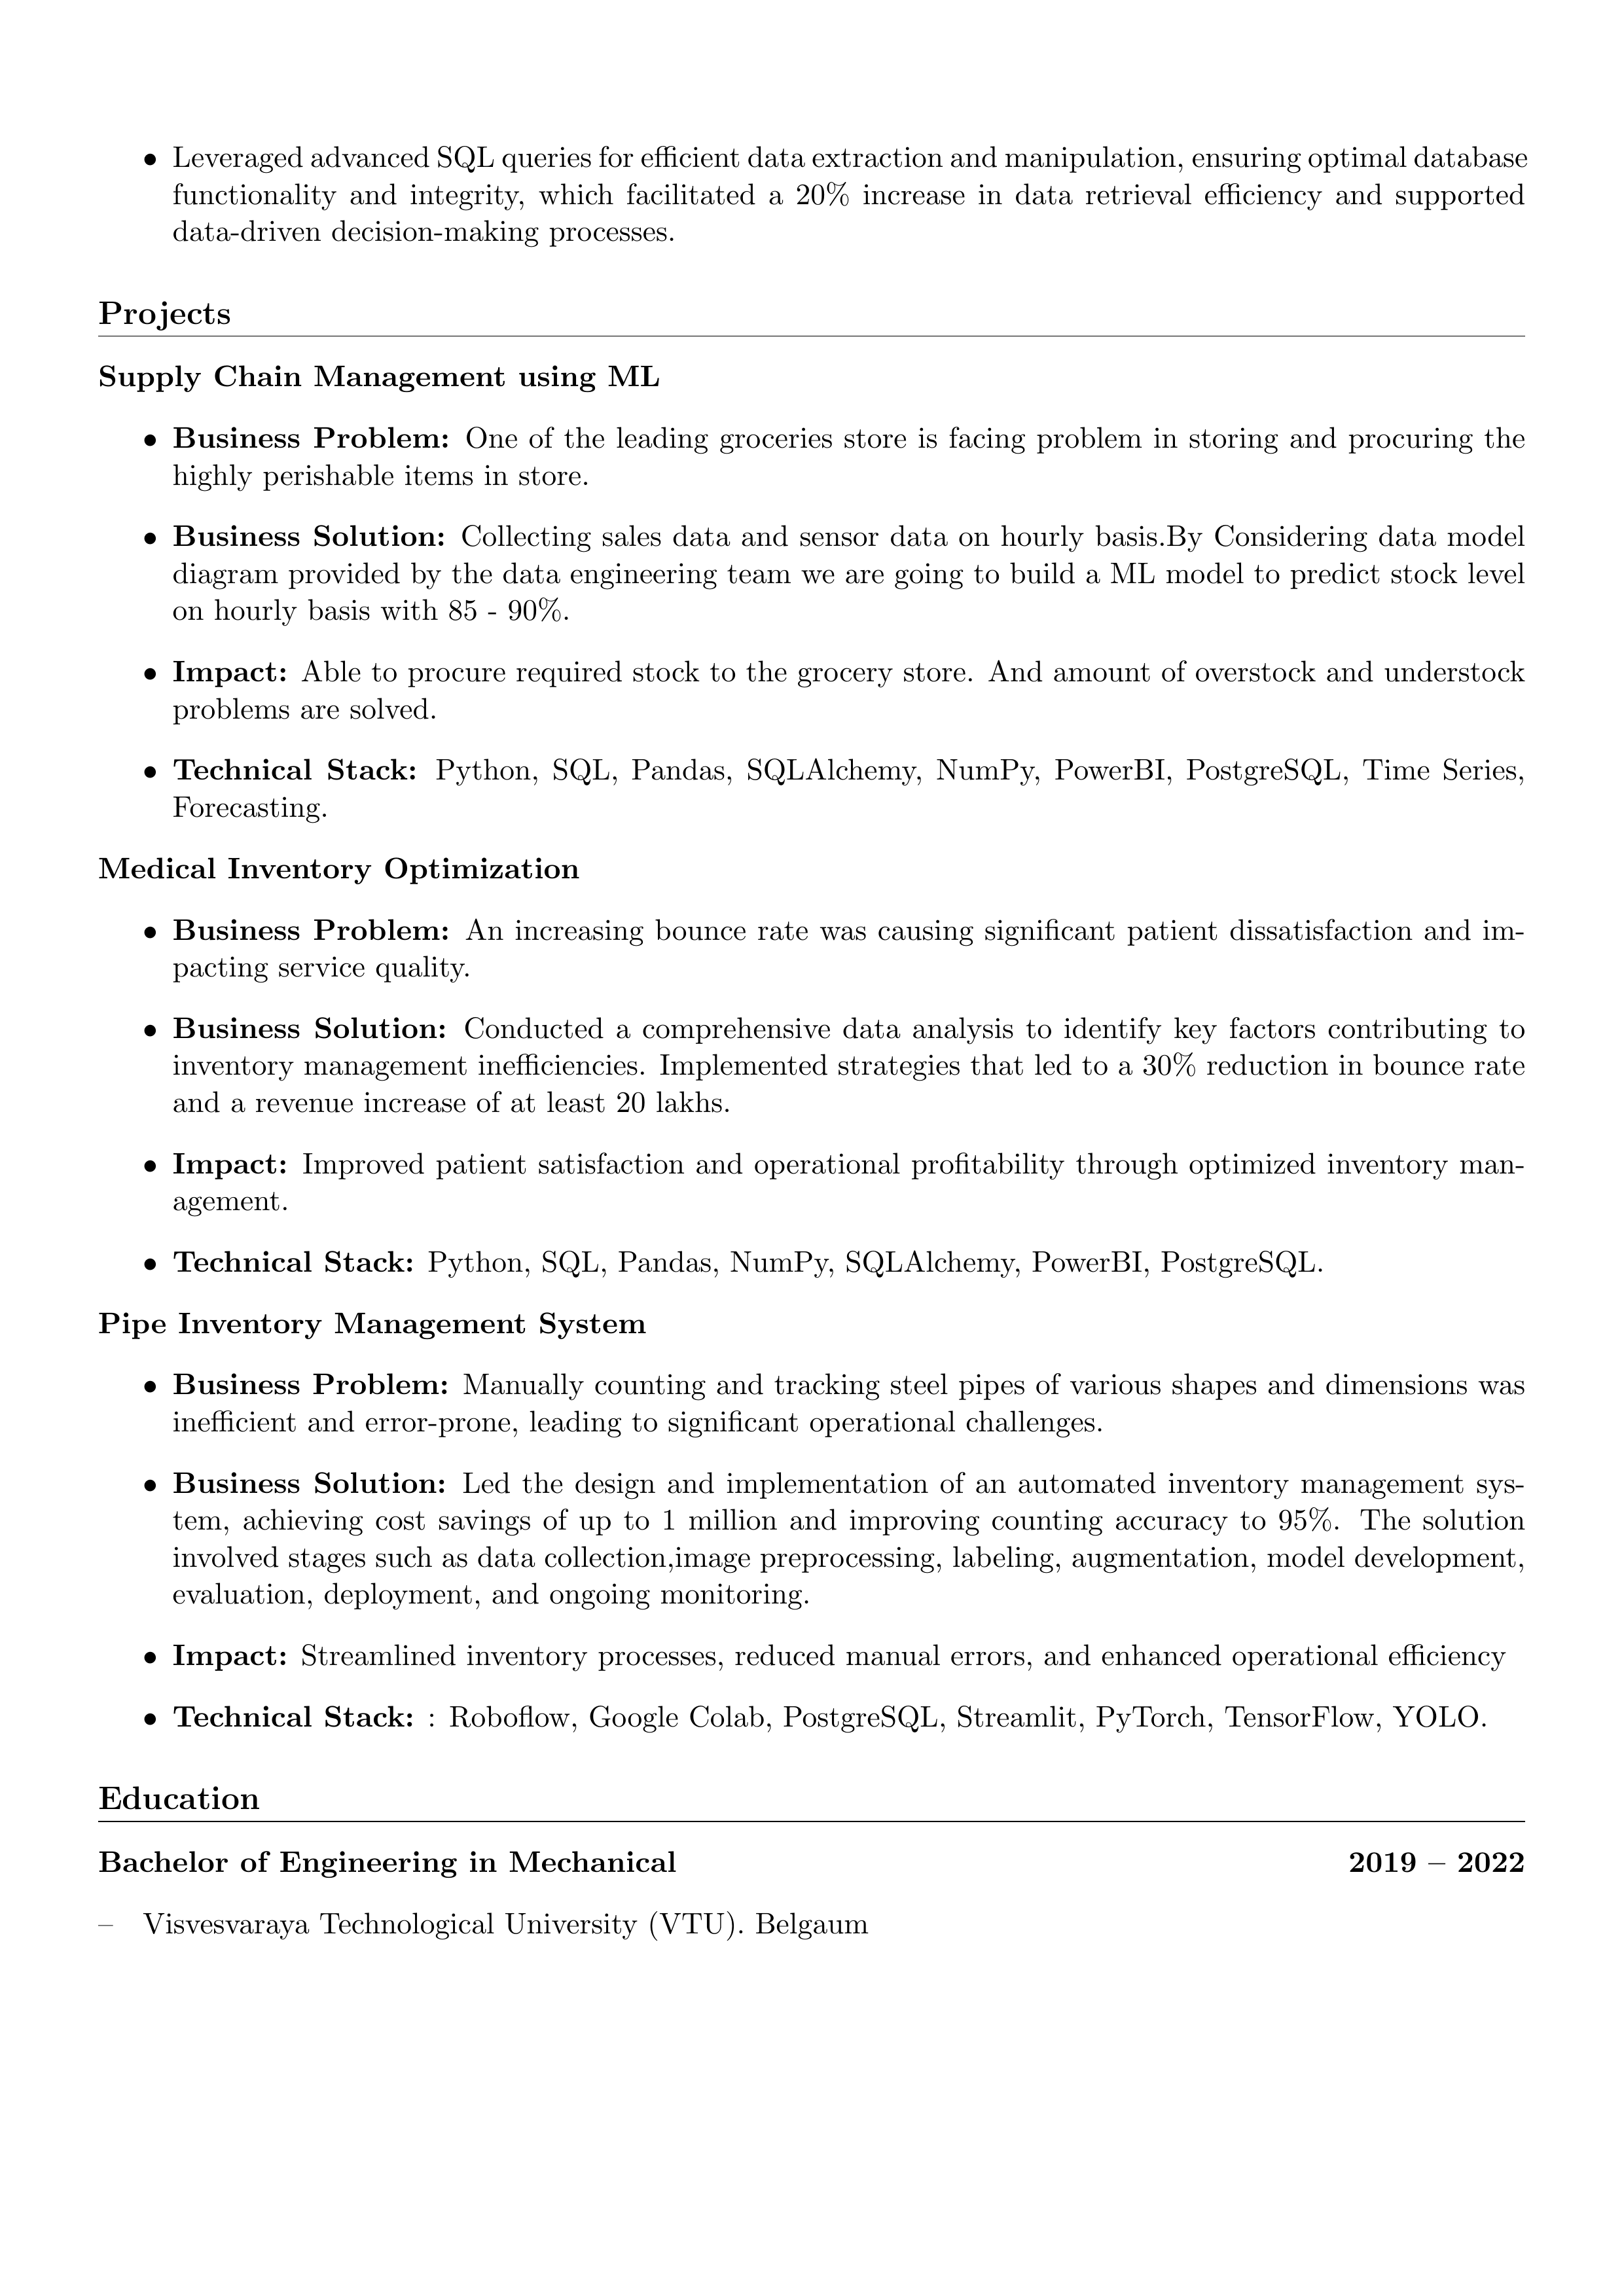

In [4]:
print("pages:", len(doc_img))
doc_img[1]

In [6]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pytesseract #0.3.10
from tqdm.notebook import tqdm

doc_txt = []
for page in tqdm(doc_img):
    text = pytesseract.image_to_string(page)
    doc_txt.append(text)

doc_txt[1]

  0%|          | 0/2 [00:00<?, ?it/s]

'e Leveraged advanced SQL queries for efficient data extraction and manipulation, ensuring optimal database\nfunctionality and integrity, which facilitated a 20% increase in data retrieval efficiency and supported\ndata-driven decision-making processes.\n\nProjects\n\nSupply Chain Management using ML\n\ne Business Problem: One of the leading groceries store is facing problem in storing and procuring the\nhighly perishable items in store.\n\ne Business Solution: Collecting sales data and sensor data on hourly basis.By Considering data model\ndiagram provided by the data engineering team we are going to build a ML model to predict stock level\non hourly basis with 85 - 90%.\n\ne Impact: Able to procure required stock to the grocery store. And amount of overstock and understock\nproblems are solved.\n\ne Technical Stack: Python, SQL, Pandas, SQLAlchemy, NumPy, PowerBI, PostgreSQL, Time Series,\nForecasting.\n\nMedical Inventory Optimization\n\ne Business Problem: An increasing bounce rate

In [7]:
title_map = {
    "4-12":"Business",
    "13-33":"Risk Factors",
    "34-44":"Financials",
    "45-46":"Directors",
    "47-83":"Data"
}

In [8]:
lst_docs, lst_ids, lst_metadata = [], [], []
for n,page in enumerate(doc_txt):
    try:
        ## get title
        title = [v for k,v in title_map.items() if n in range(int(k.split("-")[0]), int(k.split("-")[1])+1)][0]
        ## clean page
        page = page.replace("Table of Contents","")
        ## get paragraph
        for i,p in enumerate(page.split('\n\n')):
            if len(p.strip())>5:
                lst_docs.append(p.strip())
                lst_ids.append(str(n)+"_"+str(i))
                lst_metadata.append({"title":title})
    except:
        continue

print(len(lst_docs), "=", len(lst_ids), "=", len(lst_metadata))

0 = 0 = 0


In [9]:
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

In [10]:
import ollama #0.2.1

def keyword_generator(p, top=3):
    prompt = "summarize the following paragraph in 3 keywords separated by ,: "+p
    res = ollama.generate(model="phi3", prompt=prompt)["response"]
    #lst = [k.replace("\n"," ").strip() for k in res.split(",")][:top]
    #str = ", ".join(lst)
    return res.replace("\n"," ").strip()

In [11]:
p = '''Professional artists, architects and designers use NVIDIA partner products accelerated with our GPUs and software platform for a range of creative and design
use cases, such as creating visual effects in movies or designing buildings and products. In addition, generative Al is expanding the market for our workstation-
class GPUs, as more enterprise customers develop and deploy Al applications with their data on-premises.'''
print(keyword_generator(p))

Professional artists, architectural designs, AI acceleration


In [15]:
for i,doc in tqdm(enumerate(lst_docs)):
    lst_metadata[i]["keywords"] = keyword_generator(doc)

0it [00:00, ?it/s]

In [16]:
 for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

In [18]:
from matplotlib import image, pyplot

image_file = "data/image.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/image.png'